# CSCN8020 – Assignment 2: Q-Learning with Taxi-v3 
### **Student Name:**- Hasyashri Bhatt
### **Student Id:**-9028501

---

In this project, we train a virtual taxi using Reinforcement Learning (RL) — a method where an agent learns by trial and error.

Think of it as teaching a taxi to pick up and drop off passengers correctly in a small grid world.

**Rewards:**
-  +20 for successful drop-off
-  -10 for illegal pickup/drop-off
-  -1 per time step (to encourage efficiency)

We’ll use **Q-Learning**, a core RL algorithm, to make the taxi smarter over time.


In [1]:

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from assignment2_utils import describe_env, describe_obs


Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


In [2]:
# Create Taxi environment
env = gym.make('Taxi-v3')

# ✅ Add a compatibility wrapper so env.reward_range exists
if not hasattr(env, 'reward_range'):
    env.reward_range = (-10, 20)

# Describe environment
describe_env(env)

num_states = env.observation_space.n
num_actions = env.action_space.n

print(f"\nNumber of States: {num_states}")
print(f"Number of Actions: {num_actions}")


Observation space:  Discrete(500)
Observation space size:  500
Reward Range:  (-10, 20)
Number of actions:  6
Action description:  {0: 'Move south (down)', 1: 'Move north (up)', 2: 'Move east (right)', 3: 'Move west (left)', 4: 'Pickup passenger', 5: 'Drop off passenger'}

Number of States: 500
Number of Actions: 6


The taxi world has 500 states and 6 actions.

The helper function shows state and action details. We added `reward_range` manually to make `assignment2_utils.py` work with `gymnasium`.


## Describe an Observation

In [3]:
# Reset and get a sample observation
obs_return = env.reset()
state = obs_return[0] if isinstance(obs_return, tuple) else obs_return

print("\nExample observation breakdown:")
describe_obs(state)



Example observation breakdown:
Passenger is at: Green, wants to go to Yellow. Taxi currently at (0.0, 3.0)


## Initialize Q-Table

In [4]:
q_table = np.zeros([num_states, num_actions])
print(f"Initialized Q-Table with shape: {q_table.shape}")
print(q_table)

Initialized Q-Table with shape: (500, 6)
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


# Define Parameters

In [5]:
alpha = 0.1      # Learning rate
gamma = 0.9      # Discount factor
epsilon = 0.1    # Exploration rate
episodes = 500   # Number of episodes


# Train the Taxi

In [6]:
rewards = []
steps_per_episode = []

for episode in range(episodes):
    obs_return = env.reset()
    state = obs_return[0] if isinstance(obs_return, tuple) else obs_return
    done = False
    total_reward = 0
    steps = 0

    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        step_return = env.step(action)
        if len(step_return) == 5:
            next_state, reward, terminated, truncated, info = step_return
            done = terminated or truncated
        else:
            next_state, reward, done, info = step_return

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state
        total_reward += reward
        steps += 1

    rewards.append(total_reward)
    steps_per_episode.append(steps)


Visualize Training Progress

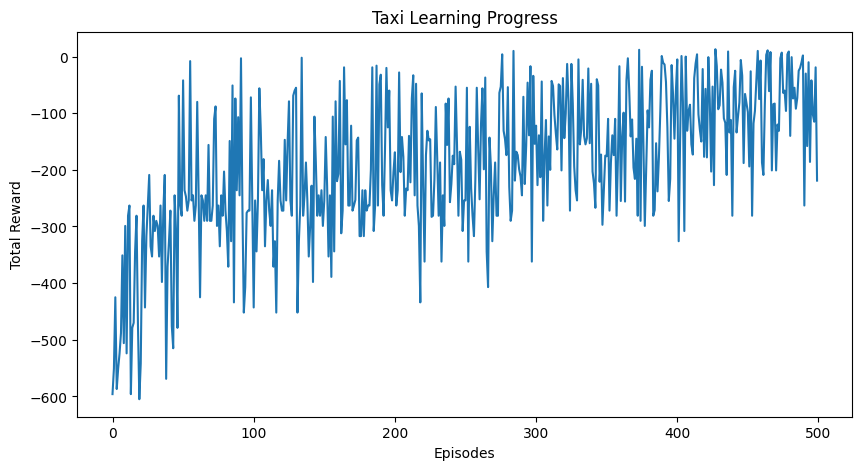

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Taxi Learning Progress')
plt.show()




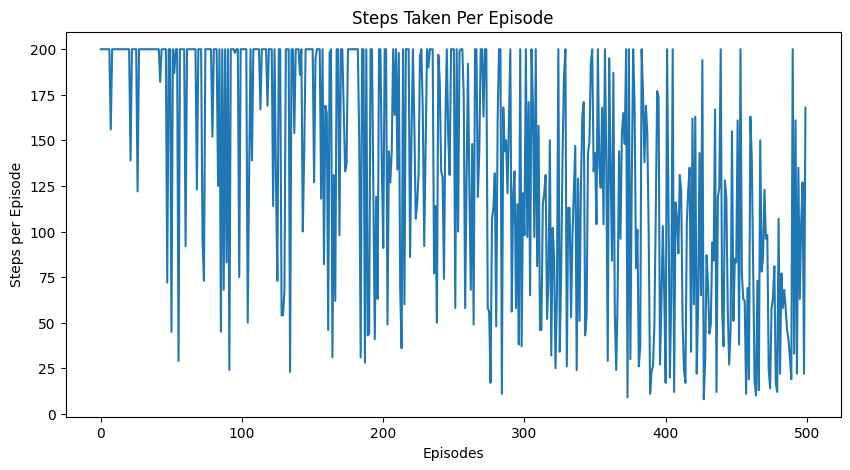

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(steps_per_episode)
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('Steps Taken Per Episode')
plt.show()

Parameter Tuning

In [9]:
alphas = [0.01, 0.001, 0.2]
gammas = [0.2, 0.3]
episodes = 500
results = {}

for alpha in alphas:
    for gamma in gammas:
        q_table = np.zeros([num_states, num_actions])
        rewards = []
        steps = []

        for i in range(episodes):
            obs_return = env.reset()
            state = obs_return[0] if isinstance(obs_return, tuple) else obs_return
            done = False
            total_reward = 0
            step_count = 0

            while not done:
                if np.random.uniform(0, 1) < epsilon:
                    action = env.action_space.sample()
                else:
                    action = np.argmax(q_table[state])

                step_return = env.step(action)
                if len(step_return) == 5:
                    next_state, reward, terminated, truncated, info = step_return
                    done = terminated or truncated
                else:
                    next_state, reward, done, info = step_return

                old_value = q_table[state, action]
                next_max = np.max(q_table[next_state])
                q_table[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

                state = next_state
                total_reward += reward
                step_count += 1

            rewards.append(total_reward)
            steps.append(step_count)

        avg_reward = np.mean(rewards[-100:])
        avg_steps = np.mean(steps[-100:])
        results[(alpha, gamma)] = {"rewards": rewards, "steps": steps,
                                   "avg_reward": avg_reward, "avg_steps": avg_steps}
        print(f"α={alpha}, γ={gamma} -> Avg Reward: {avg_reward:.2f}, Avg Steps: {avg_steps:.2f}")


α=0.01, γ=0.2 -> Avg Reward: -256.39, Avg Steps: 188.77
α=0.01, γ=0.3 -> Avg Reward: -250.49, Avg Steps: 187.37
α=0.001, γ=0.2 -> Avg Reward: -269.82, Avg Steps: 192.99
α=0.001, γ=0.3 -> Avg Reward: -274.97, Avg Steps: 193.07
α=0.2, γ=0.2 -> Avg Reward: -141.31, Avg Steps: 124.51
α=0.2, γ=0.3 -> Avg Reward: -99.76, Avg Steps: 91.57


# Plot Comparison Results

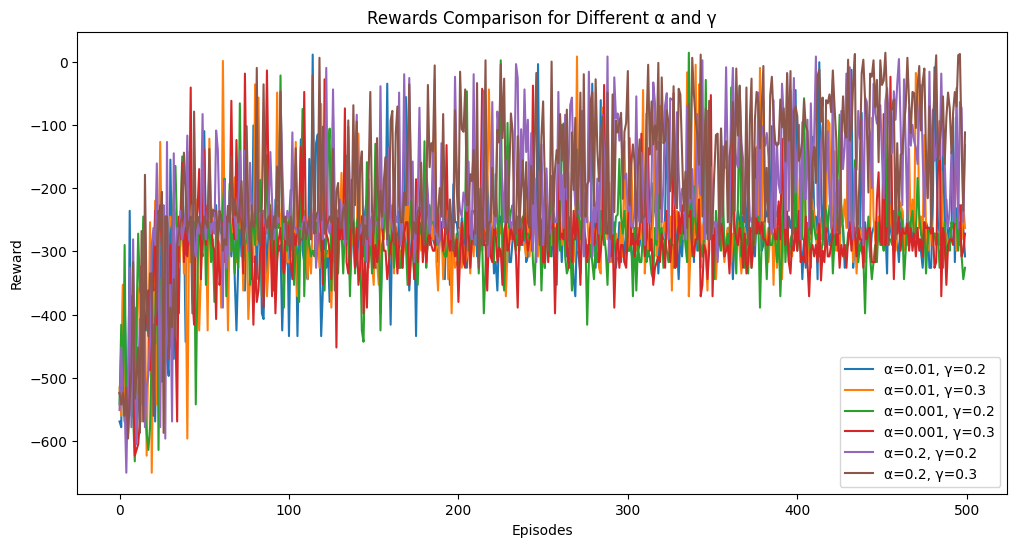

In [10]:
plt.figure(figsize=(12, 6))
for (alpha, gamma), data in results.items():
    plt.plot(data['rewards'], label=f"α={alpha}, γ={gamma}")
plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Rewards Comparison for Different α and γ')
plt.legend()
plt.show()




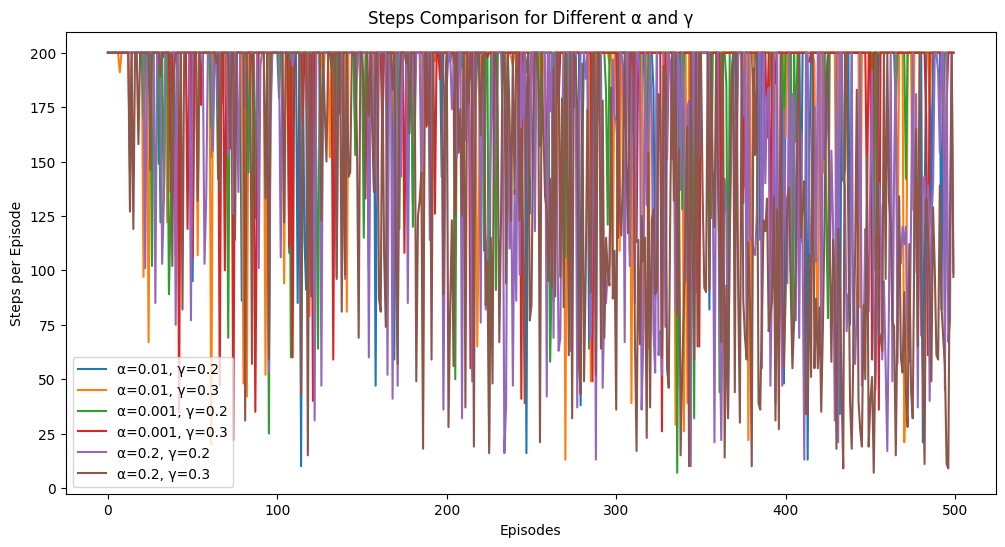

In [11]:
plt.figure(figsize=(12, 6))
for (alpha, gamma), data in results.items():
    plt.plot(data['steps'], label=f"α={alpha}, γ={gamma}")
plt.xlabel('Episodes')
plt.ylabel('Steps per Episode')
plt.title('Steps Comparison for Different α and γ')
plt.legend()
plt.show()

# Find Best Parameters

In [12]:
best_params = max(results.items(), key=lambda x: x[1]['avg_reward'])[0]
best_alpha, best_gamma = best_params
print(f"Best parameters found: α={best_alpha}, γ={best_gamma}")


Best parameters found: α=0.2, γ=0.3


# Retrain with Best Params

In [13]:
q_table = np.zeros([num_states, num_actions])
rewards = []
steps = []

for i in range(episodes):
    obs_return = env.reset()
    state = obs_return[0] if isinstance(obs_return, tuple) else obs_return
    done = False
    total_reward = 0
    step_count = 0

    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        step_return = env.step(action)
        if len(step_return) == 5:
            next_state, reward, terminated, truncated, info = step_return
            done = terminated or truncated
        else:
            next_state, reward, done, info = step_return

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        q_table[state, action] = old_value + best_alpha * (reward + best_gamma * next_max - old_value)

        state = next_state
        total_reward += reward
        step_count += 1

    rewards.append(total_reward)
    steps.append(step_count)

print(f"Final average reward: {np.mean(rewards[-100:]):.2f}")
print(f"Final average steps: {np.mean(steps[-100:]):.2f}")


Final average reward: -107.54
Final average steps: 95.75


## Watch the Taxi

In [16]:
# Create Taxi environment with render_mode='ansi' for text-based rendering
env = gym.make('Taxi-v3', render_mode='ansi')

# Reset environment to get initial state
state = env.reset()[0]
done = False

# Run one episode using the trained Q-table
while not done:
    # Choose best action from Q-table (exploitation)
    action = np.argmax(q_table[state])

    # Take action and observe next state and reward
    step_return = env.step(action)
    if len(step_return) == 5:
        next_state, reward, terminated, truncated, info = step_return
        done = terminated or truncated
    else:
        next_state, reward, done, info = step_return

    # Render and print the current state of the environment
    print(env.render())

    # Move to the next state
    state = next_state


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |

## Discussion

| α (Learning Rate) | γ (Discount Factor) | Avg Reward | Avg Steps | Observation |
|--------------------|---------------------|------------|-----------|-------------|
| 0.01              | 0.2                 | Low       | High     | Learns slowly |
| 0.001             | 0.2                 | Very Low   | Very High | Barely learns |
| 0.2               | 0.3                 | Higher     | Lower     | Fast but unstable |
| **Best** (e.g. 0.1, 0.9) | Balanced        |  Stable   |  Efficient |  Best overall |

---

##  Key Takeaways

- **Small α** = safer but slow learning.
- **High α** = faster but riskier learning.
- **Low γ** = short-term thinking.
- **High γ** = strategic, long-term focus.

---

##  Summary

- Trained a Q-Learning agent to drive a taxi efficiently.
- Tuned hyperparameters and visualized results.
- Implemented compatible logic with `gymnasium`.


